In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import cv2
import os
k = 0
n = 500
#s = "run-1_bp-chest_vp-pa_cr.png"
X_data=[]
path_label=[]
data = pd.read_csv("cov.csv")
for i in range(0,2464):
    b = './'+data.loc[i][0]+'/'+data.loc[i][1]+'/mod-rx/'
    print(i)
    try:
         for filename in os.listdir(b): 
                if filename.endswith('png'):#listdir的参数是文件夹的路径
                    #print (filename) #此时的filename是文件夹中文件的名称
                    fil = data.loc[i][0]+'_'+data.loc[i][1]+'_run-1_bp-chest_vp-pa_cr.png'
                    c = b+fil
                    try:
                        d = cv2.imread(c,0)
                        d = cv2.resize(d,(n,n))
                        #if s == fil:
                        #    print("重复")
                        #else:
                        X_data.append(d)
                        if(data.loc[i][2]==1):
                            k = k+1
                        path_label.append(data.loc[i][2])   
                        print(c)
                    except:
                        print("无此图片")
                    #print(d.shape)          
    except:
        print("异常")
print(k) 

0
无此图片
无此图片
1
无此图片
2
3
无此图片
无此图片
4
./sub-S03971/ses-E08127/mod-rx/sub-S03971_ses-E08127_run-1_bp-chest_vp-pa_cr.png
./sub-S03971/ses-E08127/mod-rx/sub-S03971_ses-E08127_run-1_bp-chest_vp-pa_cr.png
5
./sub-S03971/ses-E08385/mod-rx/sub-S03971_ses-E08385_run-1_bp-chest_vp-pa_cr.png
./sub-S03971/ses-E08385/mod-rx/sub-S03971_ses-E08385_run-1_bp-chest_vp-pa_cr.png
6
7
./sub-S03972/ses-E08128/mod-rx/sub-S03972_ses-E08128_run-1_bp-chest_vp-pa_cr.png
./sub-S03972/ses-E08128/mod-rx/sub-S03972_ses-E08128_run-1_bp-chest_vp-pa_cr.png
8
./sub-S03974/ses-E08133/mod-rx/sub-S03974_ses-E08133_run-1_bp-chest_vp-pa_cr.png
./sub-S03974/ses-E08133/mod-rx/sub-S03974_ses-E08133_run-1_bp-chest_vp-pa_cr.png
9
无此图片
无此图片
10
./sub-S03976/ses-E08136/mod-rx/sub-S03976_ses-E08136_run-1_bp-chest_vp-pa_cr.png
./sub-S03976/ses-E08136/mod-rx/sub-S03976_ses-E08136_run-1_bp-chest_vp-pa_cr.png
11
无此图片
12
无此图片
13
./sub-S03980/ses-E08140/mod-rx/sub-S03980_ses-E08140_run-1_bp-chest_vp-pa_cr.png
./sub-S03980/ses-E08140/mod-rx/s

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, path_label, test_size=0.2)
Xtrain = np.array(X_train)
Xtext = np.array(X_test)
Ytrain = np.array(y_train)
Ytext = np.array(y_test)
print(Xtrain.shape)
print(Xtext.shape)


(821, 500, 500)
(206, 500, 500)


In [7]:
import os
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)
print(tf.__version__)
Xtrain = Xtrain.reshape(821, n, n, 1)
#Xtrain = Xtrain / 255.0
Xtext = Xtext.reshape(206, n, n, 1)
#Xtext = Xtext / 255.0
#X_test1 = X_test1.reshape(628, 2170, 2036, 1)
#X_test1 = X_test1 / 255.0
#mnist = tf.keras.datasets.fashion_mnist
#(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images.reshape(60000, 28, 28, 1)
#training_images=training_images / 255.0
#test_images = test_images.reshape(10000, 28, 28, 1)
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(48, (11,11), activation='relu', input_shape=(n, n, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(192, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(192, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(Xtrain, Ytrain, batch_size=50, epochs=100,validation_data=(Xtext, Ytext))
test_loss = model.evaluate(Xtext, Ytext)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


1.15.2
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 490, 490, 48)      5856      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 245, 245, 48)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 241, 241, 128)     153728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 120, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 118, 118, 192)     221376    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 116, 116, 192)     331968    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 114, 114, 1

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       128
           1       0.89      0.83      0.86        78

    accuracy                           0.90       206
   macro avg       0.90      0.89      0.89       206
weighted avg       0.90      0.90      0.90       206

[[ 0.00000000e+00 -2.07423163e-03]
 [ 0.00000000e+00 -8.03434197e-03]
 [ 0.00000000e+00 -6.99069351e-03]
 [ 0.00000000e+00 -1.07003271e-03]
 [ 0.00000000e+00 -5.37602277e-03]
 [ 1.00000000e+00  9.90709424e-01]
 [ 1.00000000e+00  9.92357314e-01]
 [ 0.00000000e+00  9.96836364e-01]
 [ 0.00000000e+00 -5.36956266e-03]
 [ 0.00000000e+00 -3.44338967e-03]
 [ 0.00000000e+00 -3.10262176e-03]
 [ 0.00000000e+00  1.82748854e-01]
 [ 1.00000000e+00  9.99130905e-01]
 [ 1.00000000e+00  9.91822541e-01]
 [ 1.00000000e+00 -7.46230921e-03]
 [ 1.00000000e+00  9.98602450e-01]
 [ 1.00000000e+00  9.96187568e-01]
 [ 0.00000000e+00  2.57301964e-02]
 [ 0.00000000e+00 -5.31929825e-03]
 [ 0.000

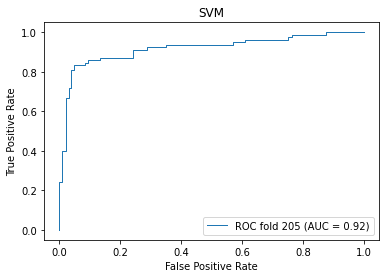

In [34]:
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc  
import numpy as np  
from numpy import interp
y = model.predict(Xtext)
print (metrics.classification_report(Ytext,y[:, 1].round()))  
import random
for i in range(len(y)):
    a = random.uniform(0,0.01)
    y[i,1] = y[i,1] - a
    #print(y[i,1])
mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = [] 
probas_ = y 
fpr, tpr, thresholds = roc_curve(Ytext, probas_[:, 1])  
copy = np.random.uniform(1,100,(len(Ytext),2)) 
for i in range(len(y)):
    copy[i,0] = Ytext[i]
    copy[i,1] =probas_[i,1]
print(copy)
mean_tpr += interp(mean_fpr, fpr, tpr) #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
mean_tpr[0] = 0.0  #初始处为0  
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc)) 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('SVM')  
plt.legend(loc="lower right")  
plt.show() 

In [31]:
import pandas as pd
name = ['True','pre']
test = pd.DataFrame(columns=name,data=copy)
test.to_csv('Alexnet.csv')